# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.size

390

In [5]:
ax = sns.distplot(df['temperature'])

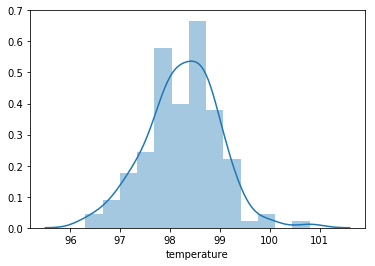

In [6]:
plt.show()

In [7]:
import scipy.stats as stats
x = stats.norm.rvs(size = 100)
stats.normaltest(x)

NormaltestResult(statistic=0.83370188652498245, pvalue=0.65911915877379545)

<p>Since the p-value is 0.295 which is greater than our significance level of 0.05, we fail to reject the null hypothesis that the distribution is normal.</p>

<h3>Question 2 : </h3>
<p>Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply</p>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


 The size is 130 which is > 30 and the observations are assumed to be independent

<h3>Question 3 :</h3>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

<h5>Answers : </h5>

Null Hypothesis : True population mean is equal to 98.6
Alternate Hypothesis : population mean is less than 98.6

Would you use a one-sample or two-sample test? Why?

One-Sample test - how different a sample mean is from pouplation
Two-Sample test - How different two sample means are from each other

I would use one-sample test as we have find the if the true pouplation mean is 98.6
 

In this situation, is it appropriate to use the  t  or  z  statistic?

t-score is used when 

1. Sample size is less than 30 
2. unknown Standard Deviation of the population

As sample size > 30 , z-statistic would be appropriate

In [9]:
sample_mean =df['temperature'].mean()
print("sample mean :", sample_mean)

t_statistic, p_value = stats.stats.ttest_1samp(df['temperature'], 98.6)
print("t statistic is:" ,t_statistic)
print("P-value is:" ,p_value)

sample mean : 98.24923076923078
t statistic is: -5.45482329236
P-value is: 2.41063204156e-07


Since the p-value is less than our significance level of 0.05, we reject the null hypothesis that the true population of the mean is 98.6. This provides proof for our alternative hypothesis that the true population mean could be less than 98.6.

In [10]:
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df.temperature, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.45482329236
p value = 4.9021570141e-08


The t-statistic is -5.45 and the z-statistic is -5.45. when the sample size is larger which is > 30 t-statistic and z-statistic have same values.

t-distribution approaches normal distribution as the degrees of freedom increases. For the laarger sample size i.e 130 we see the same value as z-score

<h3> Question 4 : </h3>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

As the sample size < 10 and unknown standard deviation of the poulation , t-statistic would be the right one to use

In [18]:

samples10_df = np.random.choice(a=df.temperature,size=10,replace=False)
# 1 sample t test
(tstat10,ttestpval10) = stats.ttest_1samp(samples10_df,98.6)
print("t-stat with sample size 10:",abs(tstat10))
print("Pvalue computed using t-stat size 10:",ttestpval10)
# With sample of size 10, zscore
zstat10, ztestpval10 = ztest(x1= samples10_df, value = 98.6)
print("z-stat with sample size 10 :",abs(zstat10))
print("Pvalue computed using z-stat size 10:",ztestpval10)

t-stat with sample size 10: 2.06406274846
Pvalue computed using t-stat size 10: 0.0690246005268
z-stat with sample size 10 : 2.06406274846
Pvalue computed using z-stat size 10: 0.0390117673482


<p>p-value of z-stat is slightly less than p-value of t-stat.</p>
<p> p-value of t-stat > 0.05 and z-stat < 0.05 </p>
<p> For the smaller sample size , t-test indicates that the null hypotheis is true where as z-test indicates that null hypothesis is false

<h3>Question 5 :</h3>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>

In [20]:
# calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674824, 99.680705711713316)


In [21]:
margin_of_error = 1.96 * np.std(df['temperature'])
mean_sample = np.mean(df['temperature'])
conf_int = (mean_sample - margin_of_error  ,mean_sample + margin_of_error)
print('95% confidence interval:',conf_int)

95% confidence interval: (96.8177295225769, 99.68073201588466)


if the temperature fals below 96.8177295225769 or above 99.68073201588466 , it considered as abnormal

<h3>Question  6 :</h3>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>


<p>I would use two-sampled t-test</p>
<p>Because two-sampled t-tests tell you how far the two different means are from each other</p>

Null Hypothesis :
H0: mean of temperatures for male = mean of temperatures for female

Alternate Hypothesis :
HA: mean of temperatures for male = mean of temperatures for female

In [22]:
female_df = df.loc[df.gender == 'F']['temperature']
male_df = df.loc[df.gender == 'M']['temperature']

In [23]:
sns.distplot(female_df,hist=False,label='Female')
sns.distplot(male_df,hist=False,label='Male')
plt.title('Distribution of Female and Male body temperature')

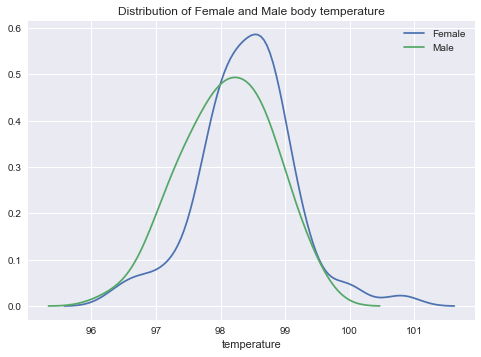

In [109]:
plt.show()

In [26]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
# Compute mean of all forces: mean_force
empirical_diff_means = diff_of_means(male_df,female_df)
mean_temperature = np.mean(df)

temp_concat = np.concatenate((male_df,female_df))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temp_concat, size=len(temp_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(male_df)],
                                     bs_sample[len(male_df):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
print('p-value =', p)


p-value = 0.9876


In [25]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean temperatures for male and female : empirical_diff_means
empirical_diff_means = diff_of_means(male_df,female_df)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_df, female_df,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= np.abs(empirical_diff_means)) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0115


In [146]:
t_statistic, p_value = stats.stats.ttest_ind(male_df, female_df)
print("t statistic is:" ,t_statistic)
print("P-value is:" ,p_value)

t statistic is: -2.28543453817
P-value is: 0.0239318831224


The p_value < 0.05, so we can say there is a significant difference between male and femeals body temperatures

In [140]:
empirical_diff_means


-0.289230769230727